In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Table of Contents
1. [Basic 1b](#Basic-1b)
2. [Basic 1c](#Basic-1c)

# Basic 1b

Stata code:
```stata
statsby _b _se N=e(N) N_clust=e(N_clust), by(tArea) ///
	saving("${taboutdir}/2. OLS/OLS_Basic1b_`set'_`dvar'_`samp'", replace): ///
	reg `dvar' ib2010.year ///
	ib11.tUni ///
	ib4.Type ///
	math math2 read read2 ///
	exp exp2   ///
	if `samp'==1 & `set'==1 & admit==1, cluster(${rutname}) baselevels
```

In [2]:
import numpy as np;
import seaborn as sns;
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import os

In [3]:
estsdir = '../estimations'
Area_labels = ["Business and Administration", 
               "Agriculture", 
               "Architecture and Art", 
               "Natural Sciences", 
               "Social Sciences", 
               "Law", 
               "Education", 
               "Humanities", 
               "Health", 
               "Technology"]

We plot the coefficients for `math` and `read`. Their quadratic counterparts are plotted below, because of the difference in scale. 

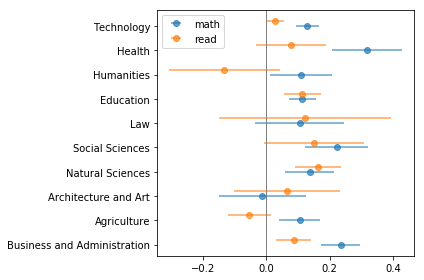

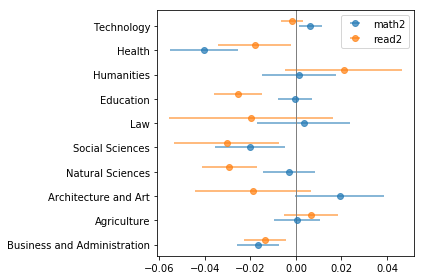

In [9]:
# Import data
os.path.join(estsdir,'OLS_Basic1b_All_ltotinc_tc_All.dta')
df = pd.read_stata(os.path.join(estsdir,'OLS_Basic1b_All_ltotinc_tc_All.dta'))
itr = pd.read_stata(os.path.join(estsdir,'OLS_Basic1b_All_ltotinc_tc_All.dta'), iterator = True)
itr.variable_labels()
df.reset_index(inplace=True)
# Plot coefficients
for degree in ['','2']:
    # math and read in same graph:
    for idx,coef in enumerate(['math', 'read']):
        plt.errorbar(df['_b_'+coef+degree], df.index+idx/5, xerr=df['_se_'+coef+degree]*1.96, marker='o', ls='none', label=coef+degree, alpha=0.7)
        plt.axvline(x=0, linewidth=1, color='grey')
        plt.yticks(df.index, Area_labels)
        plt.legend()
        plt.tight_layout()
    plt.show()

`exp` and `exp2` estimated coefficients are plotted in the same graph. Notice how there are two different $x$-axis.

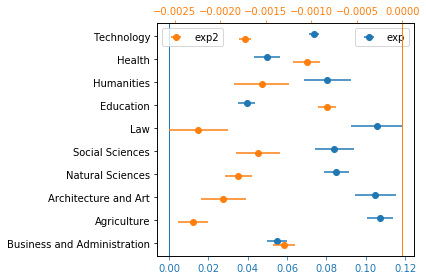

In [10]:
# exp in separate graph
fig, ax1 = plt.subplots()
ax1.errorbar(df['_b_exp'], df.index+.1, xerr=df['_se_exp']*1.96, marker='o', ls='none', label='exp', color='tab:blue')
ax1.set_xlabel('', color='tab:blue')
ax1.tick_params('x', colors='tab:blue')
plt.axvline(x=0, linewidth=1, color='tab:blue')
plt.legend()
ax2 = ax1.twiny()
ax2.errorbar(df['_b_exp2'], df.index-.1, xerr=df['_se_exp2']*1.96, marker='o', ls='none', label = 'exp2', color='tab:orange')
ax2.set_xlabel('', color='tab:orange')
ax2.tick_params('x', colors='tab:orange')
plt.axvline(x=0, linewidth=1, color='tab:orange')
plt.legend()
plt.yticks(df.index, Area_labels)
fig.tight_layout()
plt.show()

## Basic 1c

Stata code:
```stata
// Basic Regressions 1c : Get beta by Area and Selectivity controling for student Xs
statsby _b _se N=e(N) N_clust=e(N_clust), by(tArea tsel_q) ///
	saving("${taboutdir}/2. OLS/OLS_Basic1c_`set'_`dvar'_`samp'", replace): ///
	reg `dvar' ib2010.year ///
	ib11.tUni ///
	ib4.Type ///
	math math2 read read2 ///
	exp exp2   ///
	if `samp'==1 & `set'==1 & admit==1, cluster(${rutname}) baselevels
```

In [12]:
# Import data
df = pd.read_stata(os.path.join(estsdir,'OLS_Basic1c_All_ltotinc_tc_All.dta'))
itr = pd.read_stata(os.path.join(estsdir,'OLS_Basic1c_All_ltotinc_tc_All.dta'), iterator = True)
itr.variable_labels()
df.reset_index(inplace=True)

We plot `math`, `read` and `exp` estimated coefficients by target Area (`tArea`) and Selectivity terciles (`tsel_q`) (quadratic versions not plotted): 

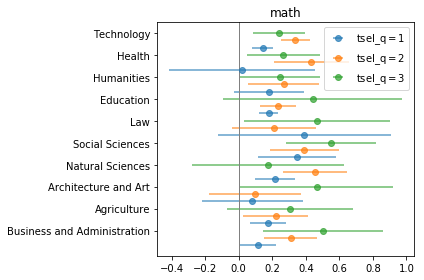

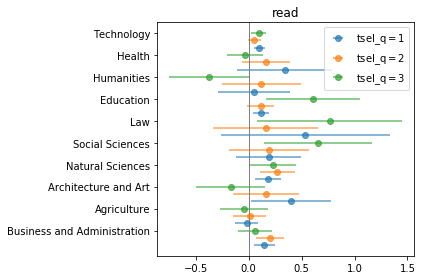

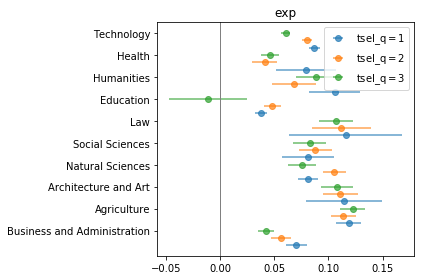

In [20]:
# Plot coefficients
for coef in ['math', 'read', 'exp']:
    for sgrp in range(min(df['tsel_q']),max(df['tsel_q'])+1):
        df_sgrp = df.loc[df['tsel_q'] == sgrp]
        plt.errorbar(df_sgrp['_b_'+coef], df_sgrp.index, xerr=df_sgrp['_se_'+coef]*1.96, marker='o', ls='none', label='tsel_q$={0}$'.format(sgrp), alpha=0.7)
        plt.axvline(x=0, linewidth=1, color='grey')
        plt.yticks(df_sgrp.index, Area_labels)
        plt.legend()
        plt.title(coef)
        plt.tight_layout()
    plt.show()